In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# y = 1/2 xT A x + bx + c
# g = Ax + b
# x [N, 1], b [N, 1]
A0 = 2* np.array([[1, 0,    0, 0, 0],
              [0, 1.25,-1, 0, 0],
              [0, -1,   2, 0, 0],
              [0, 0,    0, 1, 0],
              [0, 0,    0, 0, 1]], np.float32)
b0 = np.reshape(np.array([0, -2.641, 2.6, 0, 0], np.float32), (-1, 1))
c0 = 2.418881
dx = 0.005
NUM_ITER = 2000
RANGE = np.array([[-1.718, 0.281], [-1, 1], [-5, -1], [20, 40], [-2,2]])
def Y(A, b, c, x):
    return 0.5*np.matmul(np.matmul(np.reshape(x, (1, -1)), A), x)[0,0]+np.matmul(np.reshape(b, (1, -1)), x)[0,0]+c

In [17]:
# z(k+1) = x(k) - dx*g(k)
# x(k+1) = min_x ||x-z(k+1)||
def PGD(A, b, c, x0):
    N = A.shape[0]
    x_pre = x0
    for i in range(NUM_ITER):
        g = np.matmul(A, x_pre)+ np.reshape(b, (-1,1))
        x = x_pre - dx*g
        for j in range(N):
            if x[j]<RANGE[j,0]:
                x[j]=RANGE[j,0]
            if x[j]>RANGE[j,1]:
                x[j]=RANGE[j,1]
        x_pre = x
        y_tmp = Y(A, b, c, x)
        if i%50==0:
            print('step', i, 'y', y_tmp,)
    return x

In [30]:
# #test PGD alogrithm 
# A_tmp = 2*np.array([[1,0], [0, 1]], np.float32)
# b_tmp = np.reshape(np.array([-4, 0], np.float32), (-1, 1))
# c_tmp = 4.0
# x0_tmp = np.reshape(np.array([0.1, 0.1], np.float32), (-1, 1))
# x = PGD(A_tmp, b_tmp, c_tmp, x0_tmp)

In [20]:
x0 = np.reshape(np.array([0.1, 0.1, 0.1, 0.1, 0.1], np.float32), (-1, 1))
x0 = x0*10
t=PGD(A0, b0, c0, x0)
print t
x1 = t[0]+0.718
x2 = t[1]
x3 = t[2]
x4 = 0.1*t[3]-2
x5 = t[4]
print 'answer', 'x1={}, x2={}, x3={}, x4={}, x5={}'.format(x1, x2, x3, x4, x5)


('step', 0, 'y', 403.4869323381958)
('step', 50, 'y', 402.32082468362427)
('step', 100, 'y', 401.9344444880066)
('step', 150, 'y', 401.80451971383667)
('step', 200, 'y', 401.7602375158844)
('step', 250, 'y', 401.7449310431061)
('step', 300, 'y', 401.7395971426544)
('step', 350, 'y', 401.73773628564453)
('step', 400, 'y', 401.7370918402252)
('step', 450, 'y', 401.7368522295532)
('step', 500, 'y', 401.736747563797)
('step', 550, 'y', 401.7367396959839)
('step', 600, 'y', 401.7367315897522)
('step', 650, 'y', 401.7367268213806)
('step', 700, 'y', 401.7366793760834)
('step', 750, 'y', 401.73672539086914)
('step', 800, 'y', 401.7367072710571)
('step', 850, 'y', 401.73668509812927)
('step', 900, 'y', 401.73670607896423)
('step', 950, 'y', 401.7367168078003)
('step', 1000, 'y', 401.7367225298462)
('step', 1050, 'y', 401.73672658296204)
('step', 1100, 'y', 401.7367268213806)
('step', 1150, 'y', 401.7367268213806)
('step', 1200, 'y', 401.7367268213806)
('step', 1250, 'y', 401.7367268213806)
('s

In [19]:
# validate our answer 
# we only need to solve x2 and x3
def Y_23(x2, x3):
    return np.square((x2+0.718)/2)+np.square(x3-0.2)+np.square(x2-x3-1.5)

47.988465000000005 1.752089
1.7367048
48.02788100000001


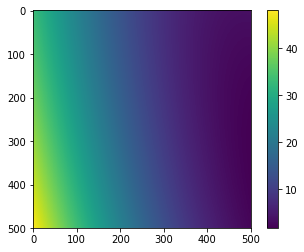

In [25]:
r_x2 = [-1,1]
r_x3 = [-5, -1]
y23 = []
M=500
d2 = float(r_x2[1]-r_x2[0])/M
d3 = float(r_x3[1]-r_x3[0])/M
for i in range(M):
    for j in range(M):
        y23.append(Y_23(r_x2[0]+i*d2, r_x3[0]+j*d3))
y23 = np.reshape(y23, (M, M))
print y23.max(), y23.min()
print Y_23(0.2564, -1)
print Y_23(1, -5)
plt.imshow(y23)
plt.colorbar()
plt.show()

7.751201 1.756041
1.7367048


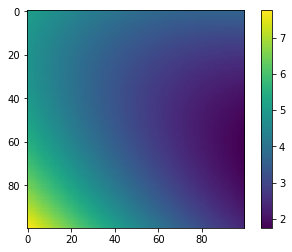

In [26]:
r_x2 = [-1,1]
r_x3 = [-2, -1]
y23 = []
M=100
d2 = float(r_x2[1]-r_x2[0])/M
d3 = float(r_x3[1]-r_x3[0])/M
for i in range(M):
    for j in range(M):
        y23.append(Y_23(r_x2[0]+i*d2, r_x3[0]+j*d3))
y23 = np.reshape(y23, (M, M))
print y23.max(), y23.min()
print Y_23(0.2564, -1)
plt.imshow(y23)
plt.colorbar()
plt.show()